# Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('final_internship_data.csv')
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


# Information about the data 

## Check data types of each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

## Statistical Distribution about the data 

In [5]:
num_atts = ['fare_amount', 'passenger_count', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing']
date_time_atts = ['year', 'month', 'weekday', 'day', 'hour']
cat_atts = list(set(df.columns) - (set(num_atts) | set(date_time_atts)))

In [6]:
df[num_atts].describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,500000.0,11.358361,9.916617,-44.900000,6.000000,8.500000,12.500000,500.000000
passenger_count,500000.0,1.683428,1.307395,0.000000,1.000000,1.000000,2.000000,6.000000
jfk_dist,499995.0,385.279367,2419.087483,1.017646,41.341514,42.523163,43.785649,30133.067880
ewr_dist,499995.0,380.503657,2428.804740,1.460945,32.173712,34.787507,38.304502,30167.595967
lga_dist,499995.0,363.843772,2425.075903,0.382119,17.100762,19.591554,22.214815,30167.285794
sol_dist,499995.0,363.674038,2428.348683,0.532545,14.886989,18.347580,22.417812,30159.407296
nyc_dist,499995.0,355.991423,2428.730839,0.080500,7.147384,10.458151,14.448699,30162.285356
distance,499995.0,19.468775,367.299601,0.000000,1.214550,2.116970,3.890070,12399.956433
bearing,499995.0,0.297145,1.804548,-3.141593,-0.854721,-0.050442,2.206769,3.141593


In [7]:
df[cat_atts].describe(include=['object']).T

,count,unique,top,freq
Weather,500000,5,sunny,100433
pickup_datetime,500000,461206,2012-01-26 21:22:00,6
Traffic Condition,500000,3,Congested Traffic,166847
User Name,500000,221675,Michael Smith,224
Car Condition,500000,4,Very Good,125312
User ID,500000,500000,KHVrEVlD,1
key,500000,500000,2009-06-15 17:26:21.0000001,1
Driver Name,500000,221700,Michael Smith,257


In [8]:
df[date_time_atts].describe().T

,count,mean,std,min,25%,50%,75%,max
year,500000.0,2011.739132,1.860889,2009.0,2010.0,2012.0,2013.0,2015.0
month,500000.0,6.268650,3.437815,1.0,3.0,6.0,9.0,12.0
weekday,500000.0,3.042008,1.949240,0.0,1.0,3.0,5.0,6.0
day,500000.0,15.684206,8.681066,1.0,8.0,16.0,23.0,31.0
hour,500000.0,13.510834,6.511571,0.0,9.0,14.0,19.0,23.0


## Check for null values

In [9]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

## Check for duplicates

In [10]:
df.duplicated().sum()

0

There is no duplicates in the data

# Drop Missing Values

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

# Drop Unnecessary Columns

In [13]:
df.drop(columns=['pickup_datetime'], inplace=True)

In [14]:
df.drop(columns=['User Name'], inplace=True)

In [15]:
df.drop(columns=['User ID'], inplace=True)

In [16]:
df.drop(columns=['Driver Name'], inplace=True)

In [17]:
df.drop(columns=['key'], inplace=True)

In [18]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


# Check for unique Values

In [19]:
df.nunique()

Car Condition             4
Weather                   5
Traffic Condition         3
fare_amount            1688
pickup_longitude      95037
pickup_latitude      119115
dropoff_longitude    108283
dropoff_latitude     135053
passenger_count           7
hour                     24
day                      31
month                    12
weekday                   7
year                      7
jfk_dist             490613
ewr_dist             490613
lga_dist             490613
sol_dist             490613
nyc_dist             490613
distance             485705
bearing              485636
dtype: int64

# Visualizations of numerical features

## Set Color Palette

## Boxplot

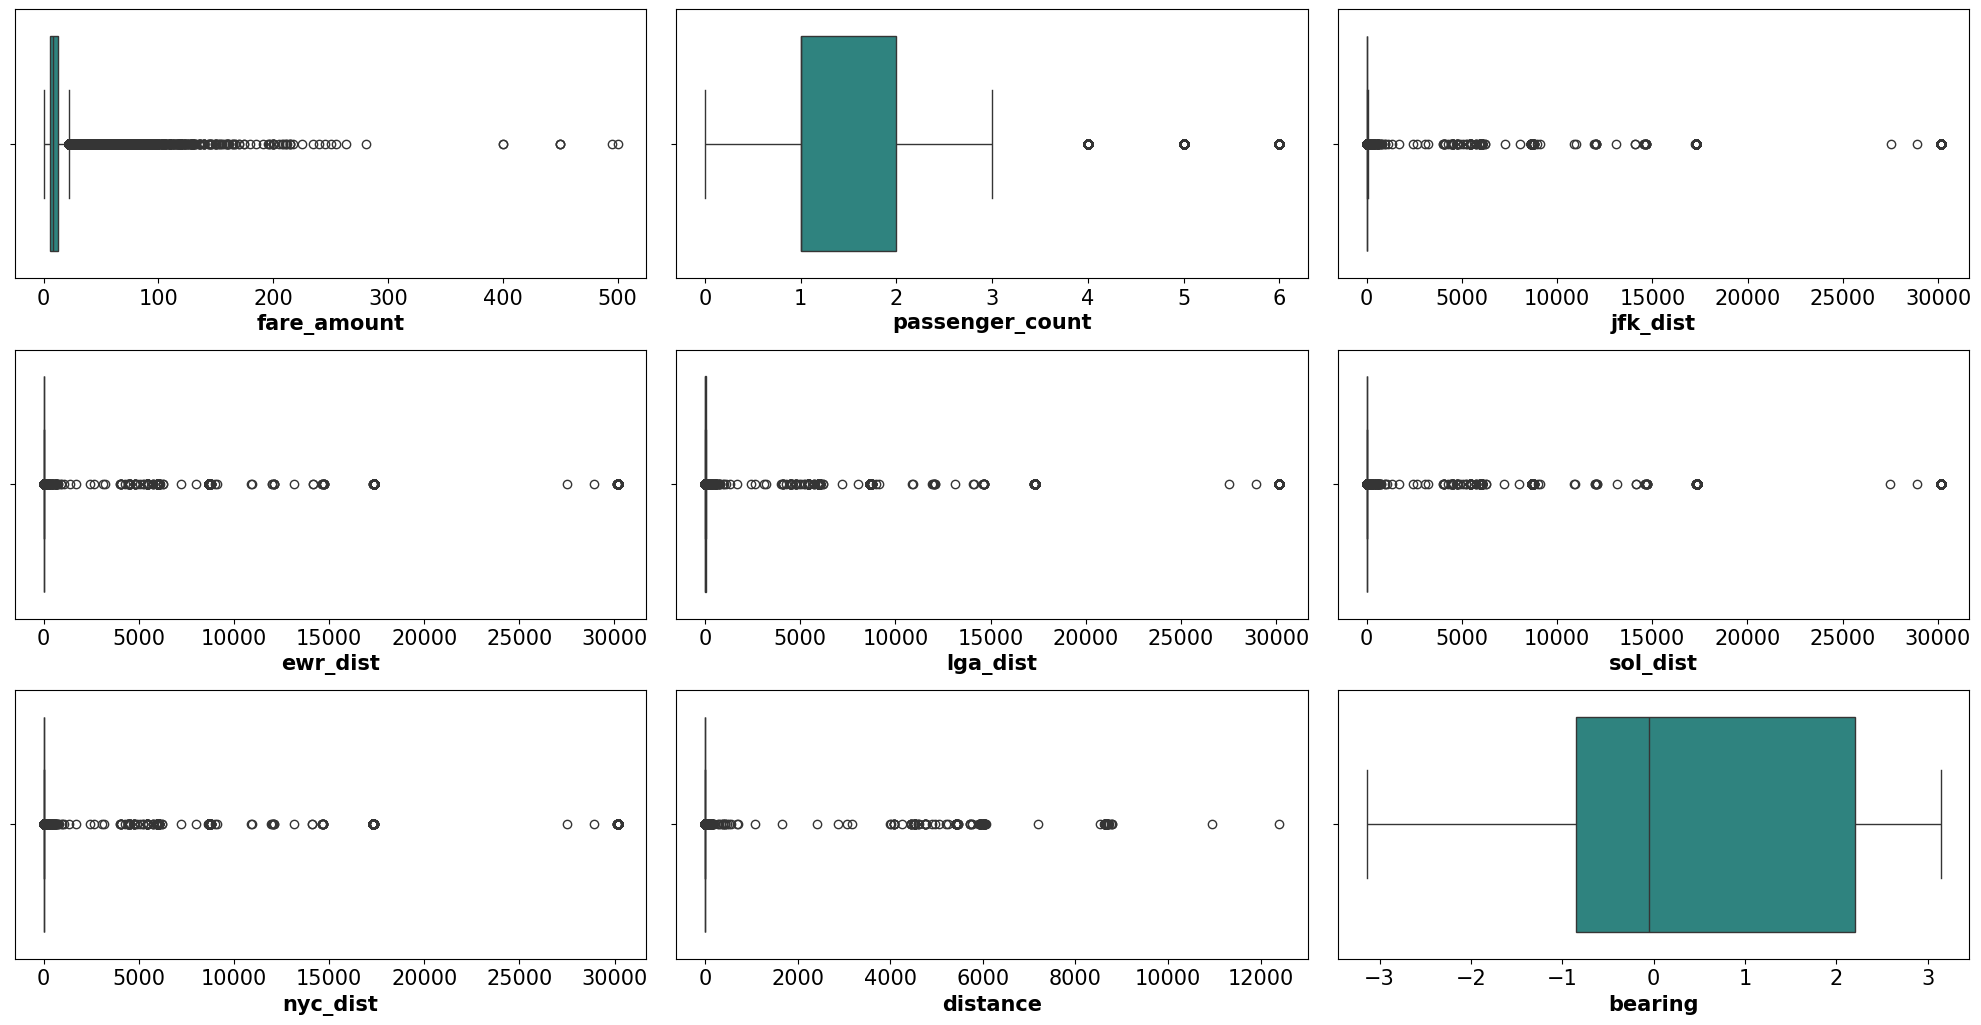

In [39]:
plt.figure(figsize=(20,20))

for i, col in enumerate(num_atts, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=df[col], palette='viridis')
    plt.xlabel(col, fontsize=15,fontweight='bold')
    plt.xticks(fontsize=15)

plt.tight_layout()
plt.show()

This boxplot is used to detect outliers in the data , as we see there is outliers in [fare amount] column which shows that there is a negative amounts which is impossible 

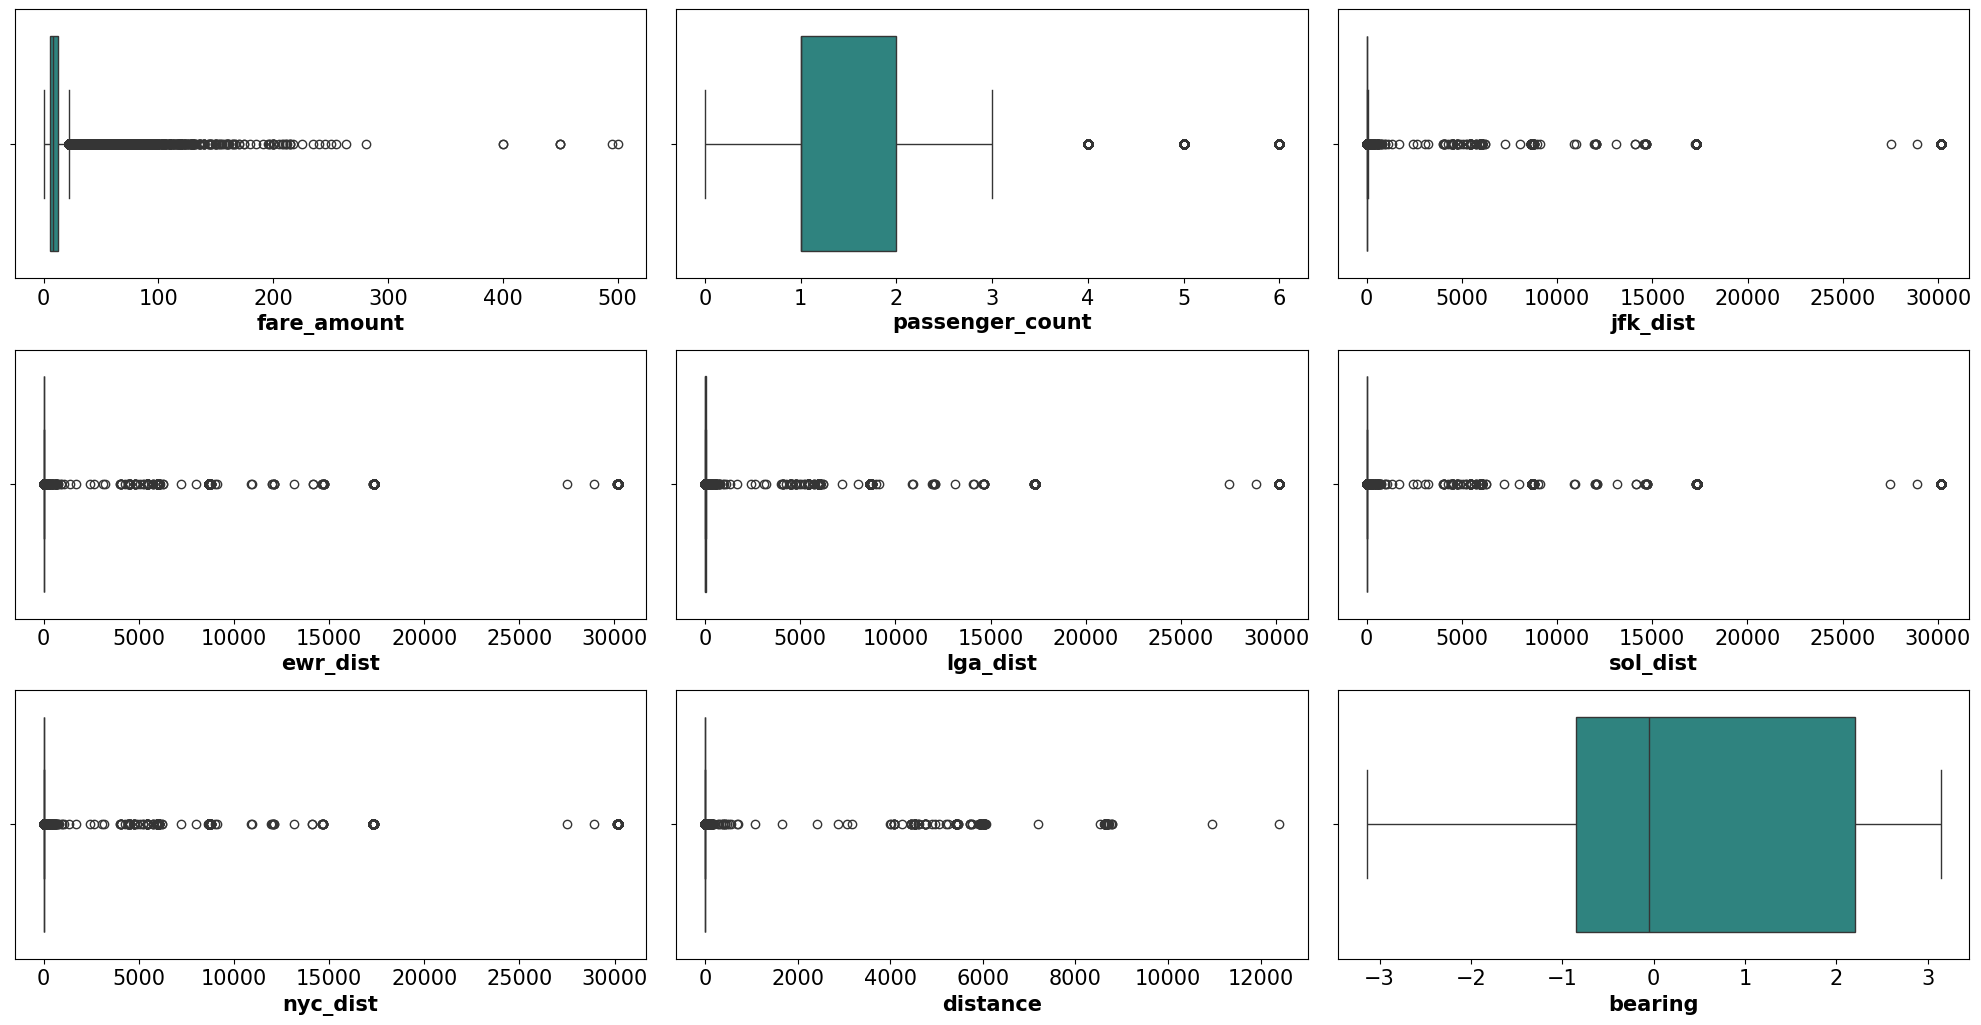

In [21]:
#Drop Outliers in fare_amount which is any negative values
df = df[df['fare_amount'] > 0]
plt.figure(figsize=(20,20))

for i, col in enumerate(num_atts, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=df[col], palette='viridis')
    plt.xlabel(col, fontsize=15,fontweight='bold')
    plt.xticks(fontsize=15)

plt.tight_layout()
plt.show()


## Histogram

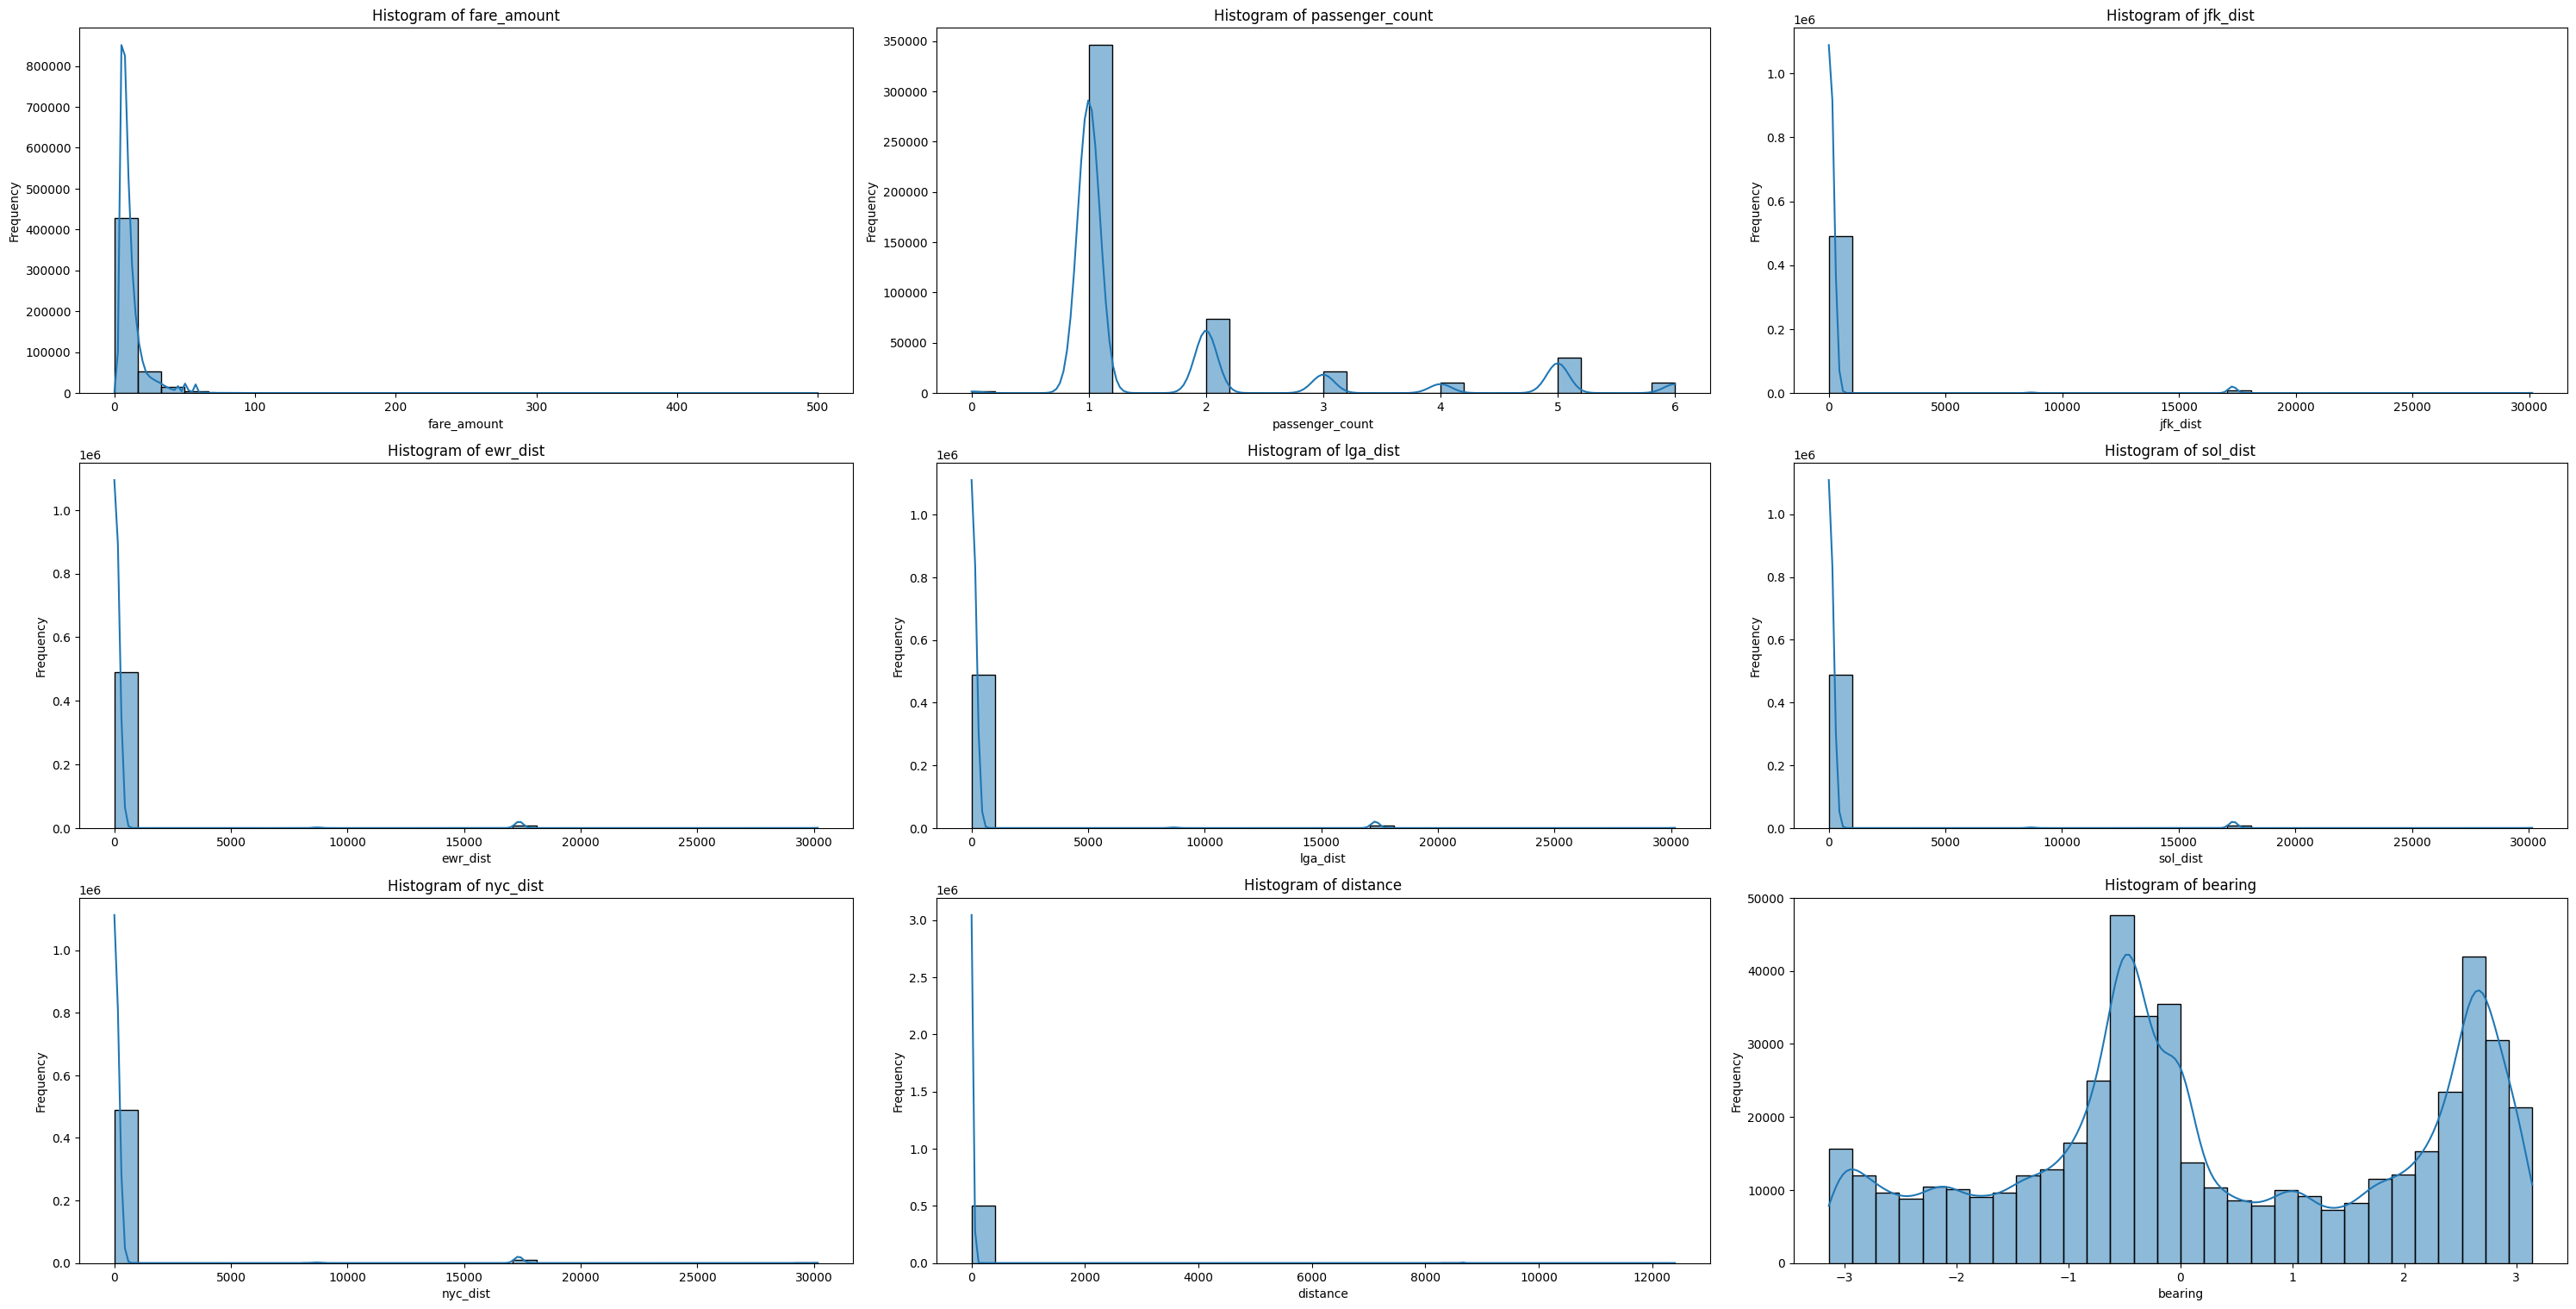

In [22]:
plt.figure(figsize=(30, 30))

for i, col in enumerate(num_atts, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

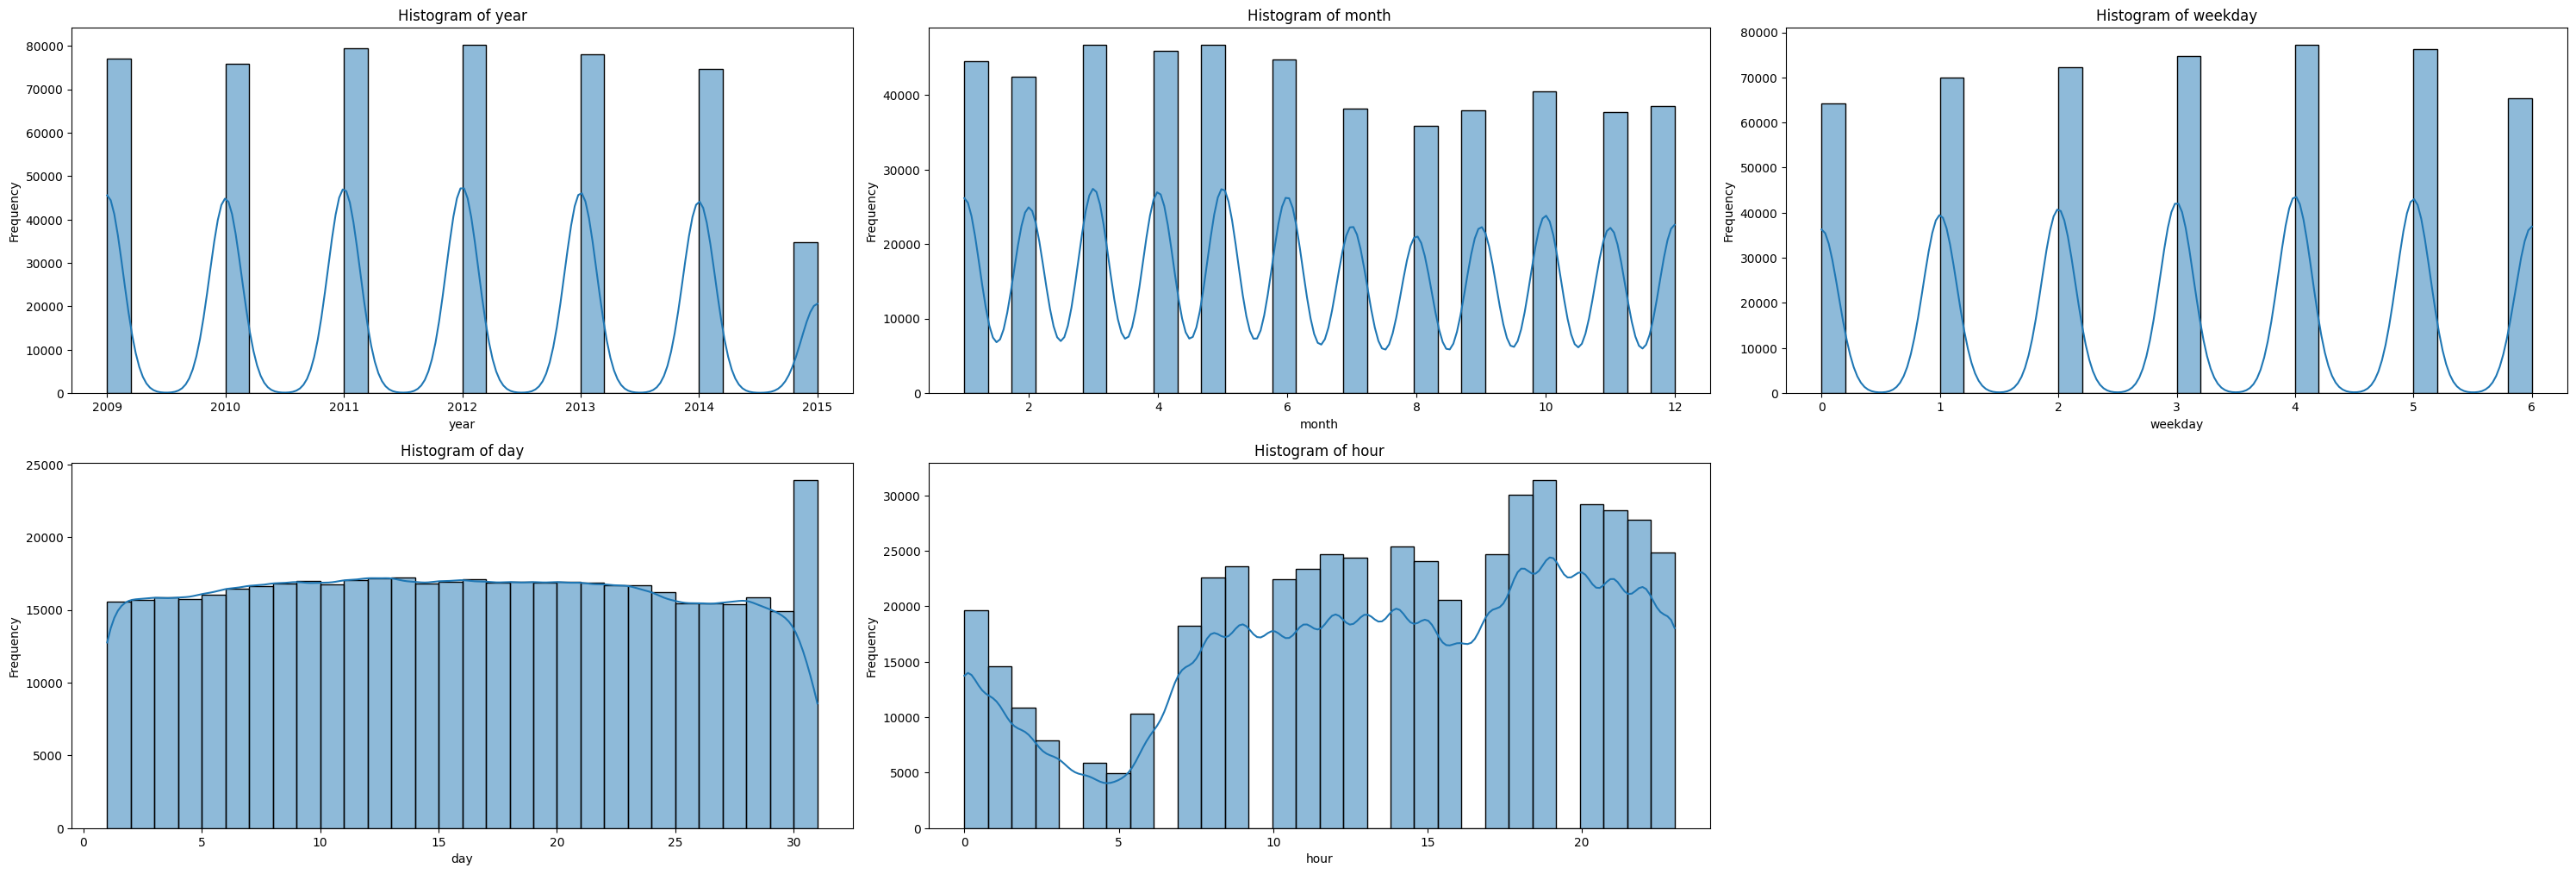

In [23]:
plt.figure(figsize=(30, 30))

for i, col in enumerate(date_time_atts, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

we notice that the number of orders in a certain hour is more than the other hours

## KDE Plots:

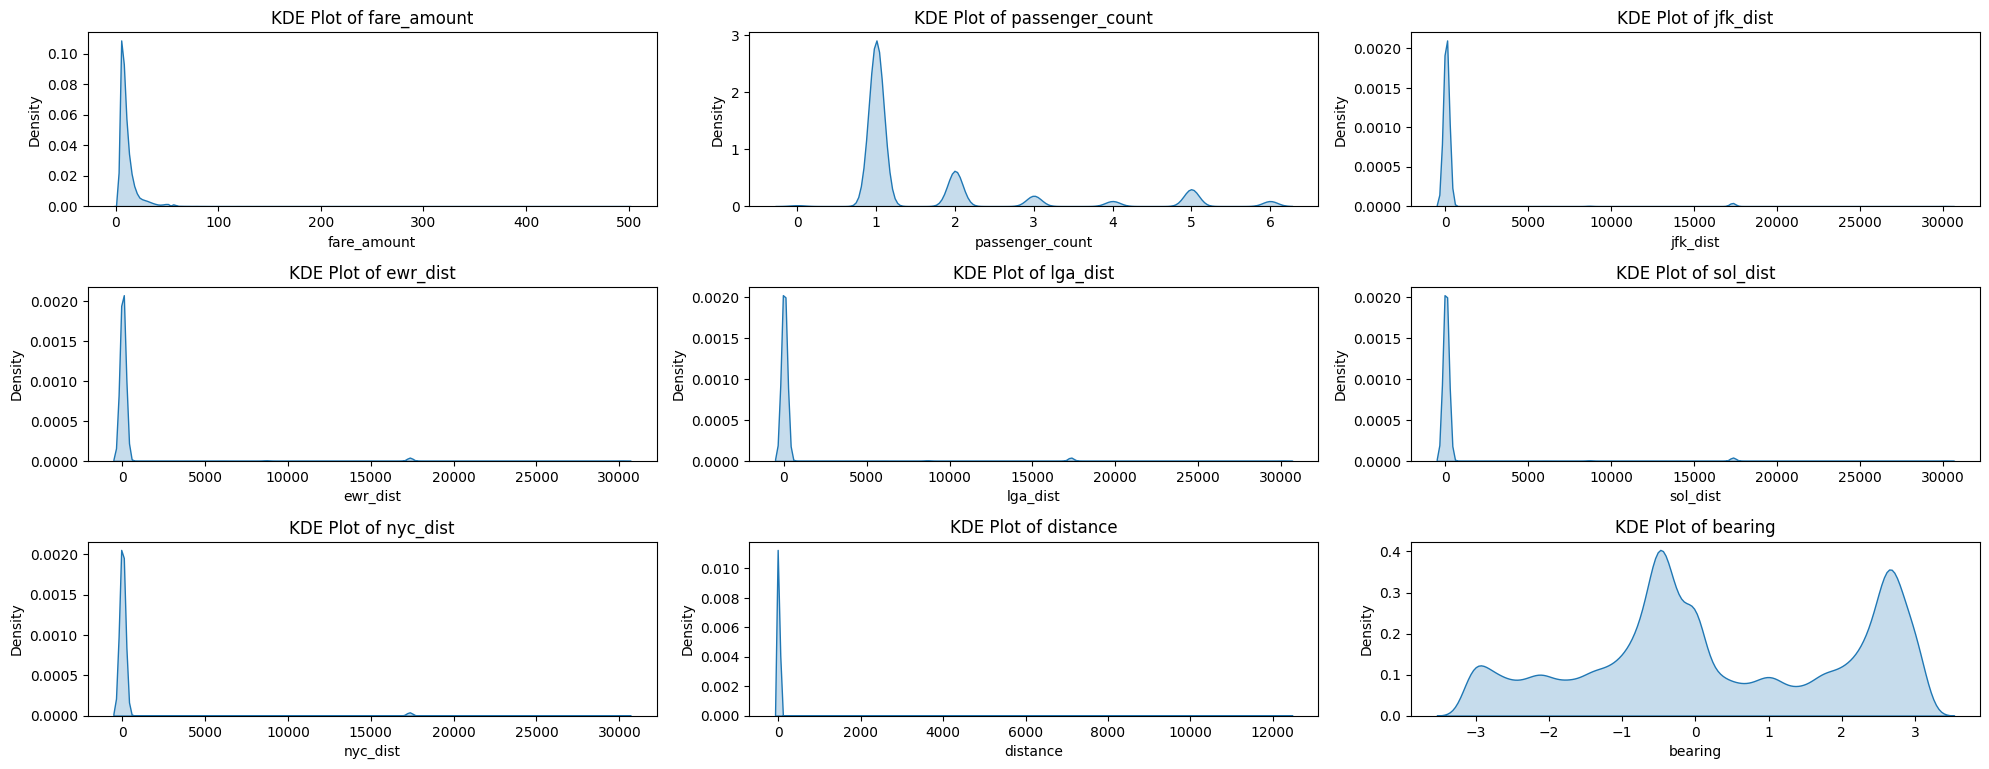

In [24]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_atts, 1):
    plt.subplot(6, 3, i)
    sns.kdeplot(df[col], shade=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()   
plt.show()

## Line Plots (e.g., exploring trends over time):

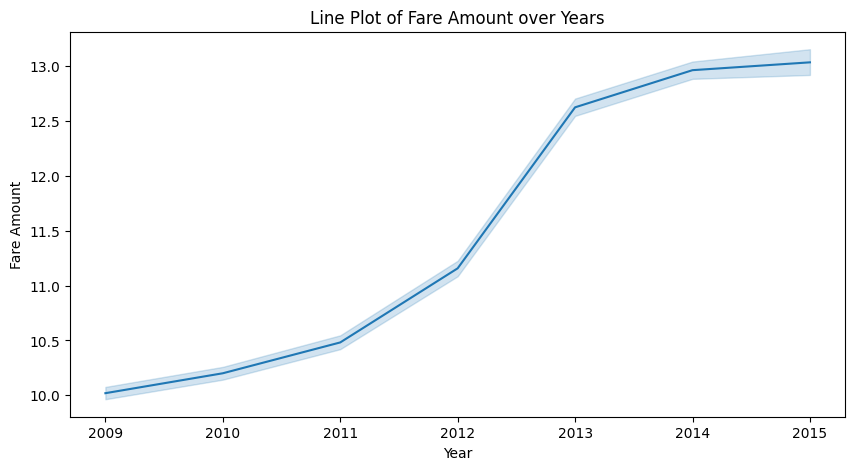

In [25]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['year'], y=df['fare_amount'])
plt.title('Line Plot of Fare Amount over Years')
plt.xlabel('Year')
plt.ylabel('Fare Amount')
plt.show()


This graph indicates that the fare amount increases over years

## Heatmap

In [31]:
numerical_features = ['fare_amount', 'passenger_count', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing', 'year', 'month', 'weekday', 'day', 'hour']

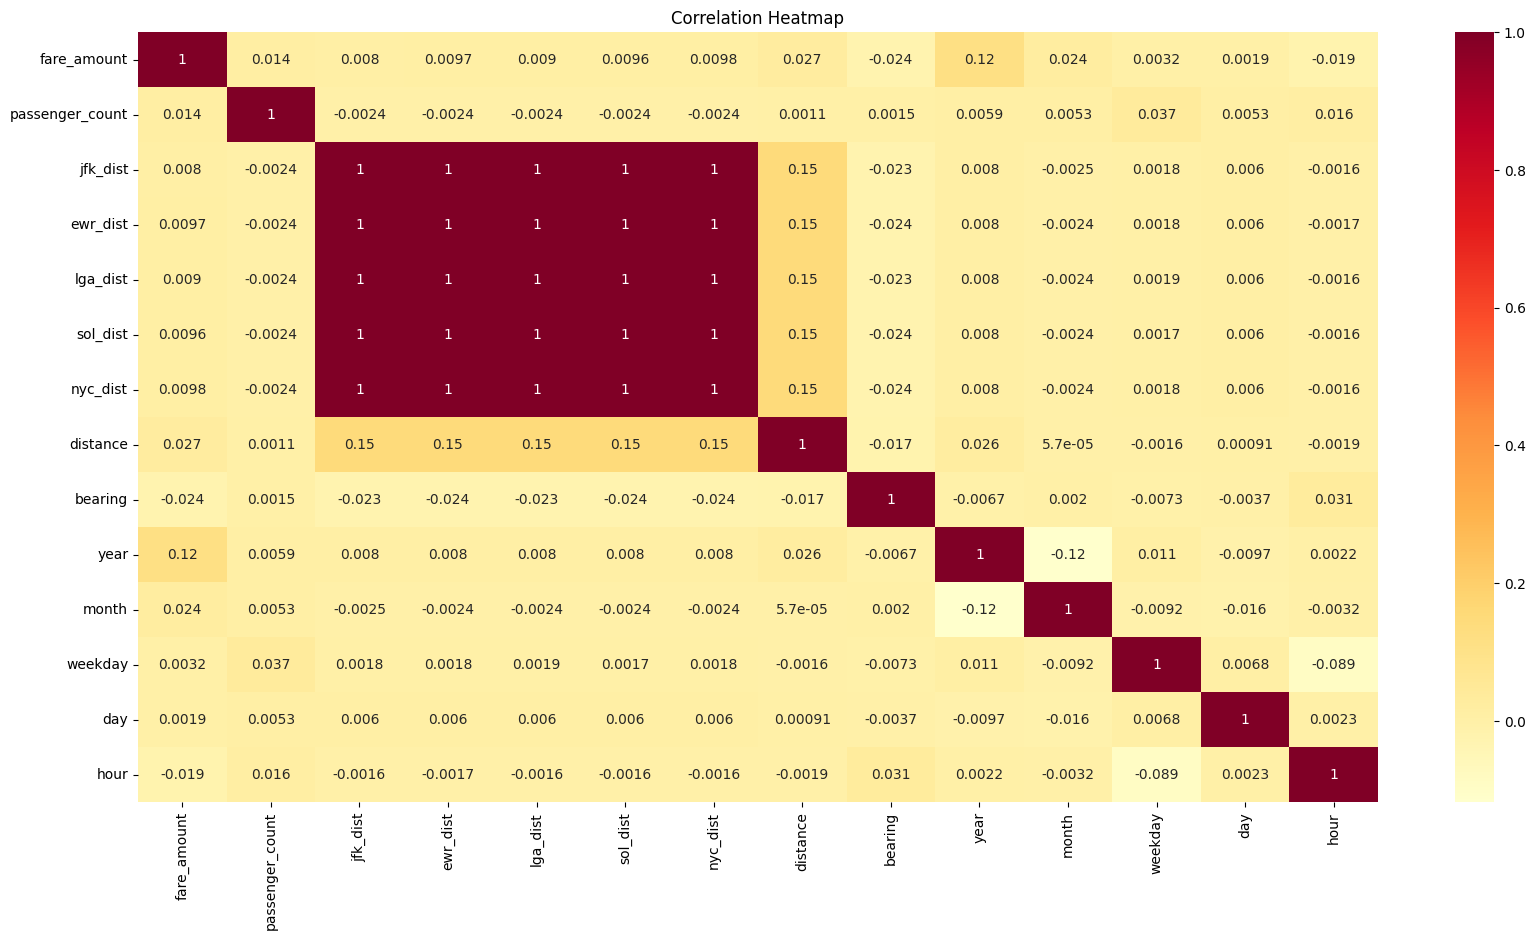

In [33]:
plt.figure(figsize=(20, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()


In [34]:
df[numerical_features].corr()['fare_amount'].sort_values(ascending=False)

fare_amount        1.000000
year               0.115864
distance           0.026565
month              0.024349
passenger_count    0.013818
nyc_dist           0.009777
ewr_dist           0.009667
sol_dist           0.009622
lga_dist           0.009019
jfk_dist           0.008014
weekday            0.003176
day                0.001915
hour              -0.019297
bearing           -0.024304
Name: fare_amount, dtype: float64

# Visualizations of categorical features

In [40]:
# def add_counts(ax):
#     for p in ax.patches:
#         ax.annotate(f'{int(p.get_height())}', 
#                     (p.get_x() + p.get_width() / 2., p.get_height()), 
#                     ha='center', va='center', 
#                     xytext=(0, 10), 
#                     textcoords='offset points')
# sns.set_palette("YlOrRd")

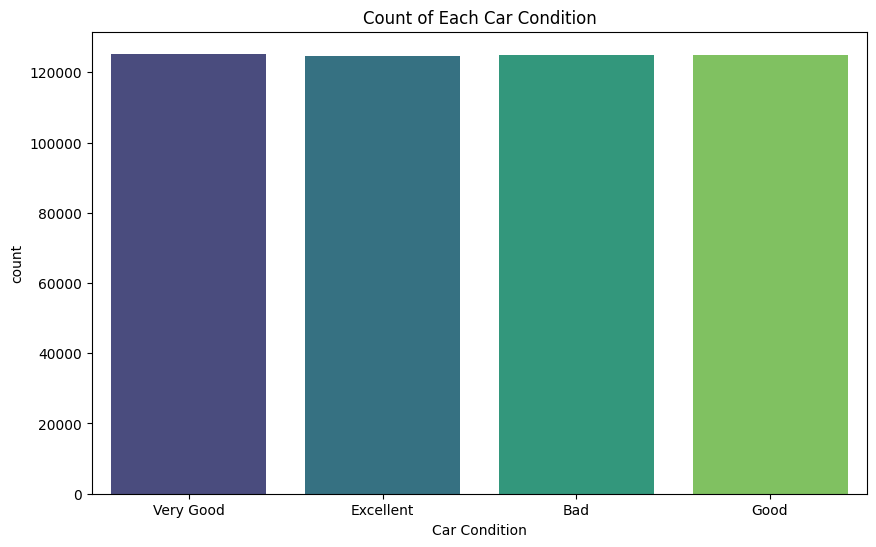

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Car Condition', data=df , palette='viridis')
plt.title('Count of Each Car Condition')
plt.show()


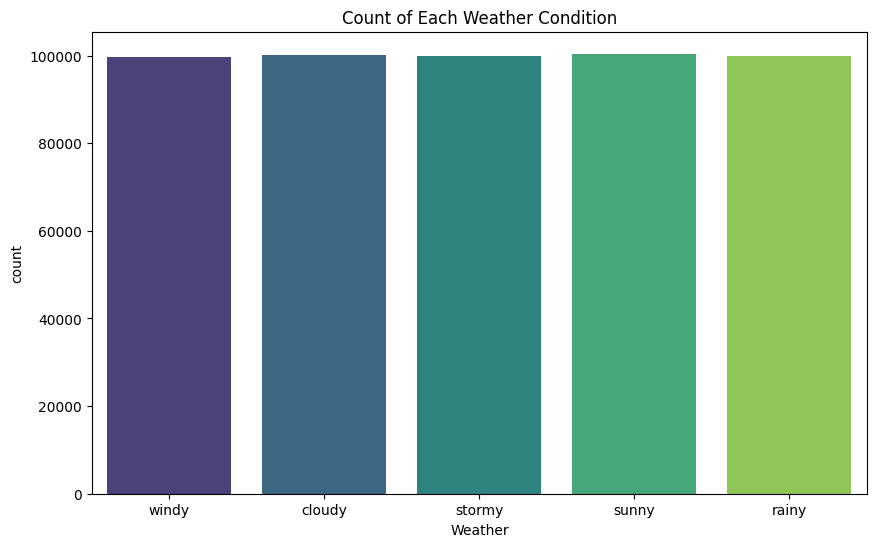

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather', data=df, palette='viridis')
plt.title('Count of Each Weather Condition')
plt.show()

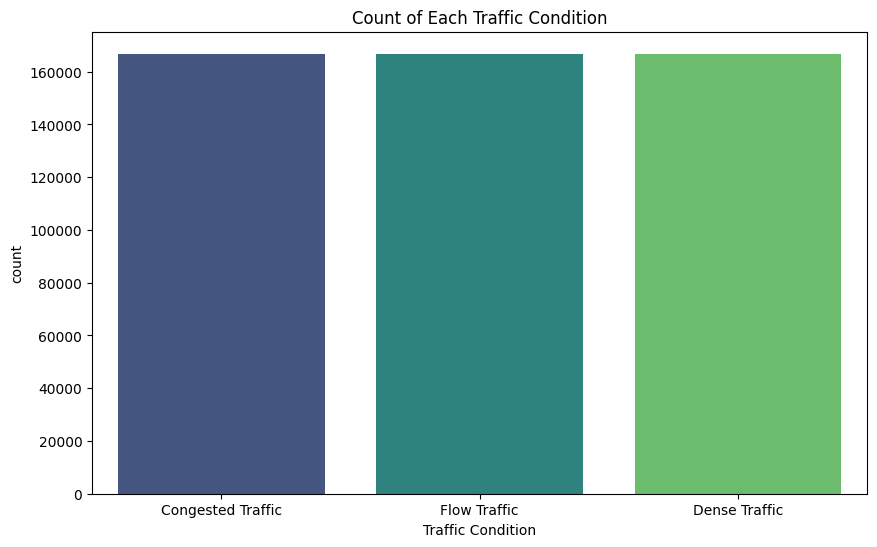

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic Condition', data=df, palette='viridis')
plt.title('Count of Each Traffic Condition')
plt.show()

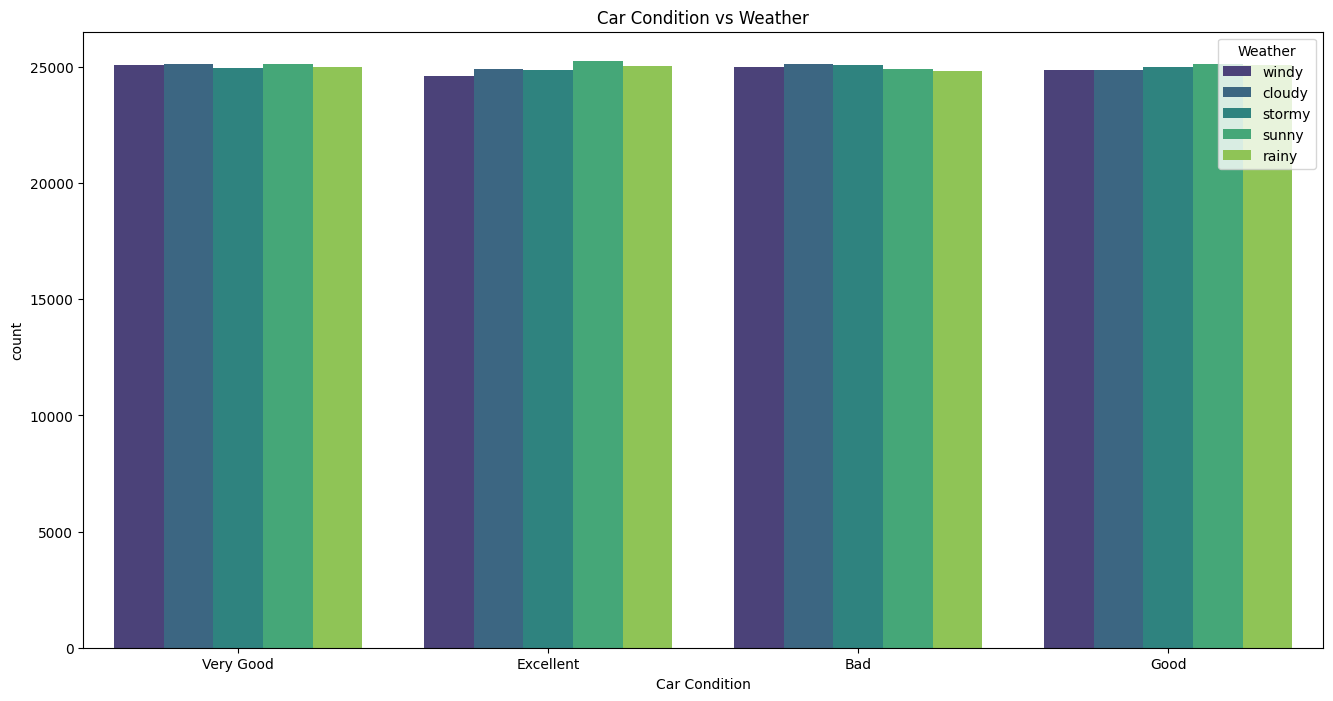

In [46]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Car Condition', hue='Weather', data=df, palette='viridis')
plt.title('Car Condition vs Weather')
plt.show()

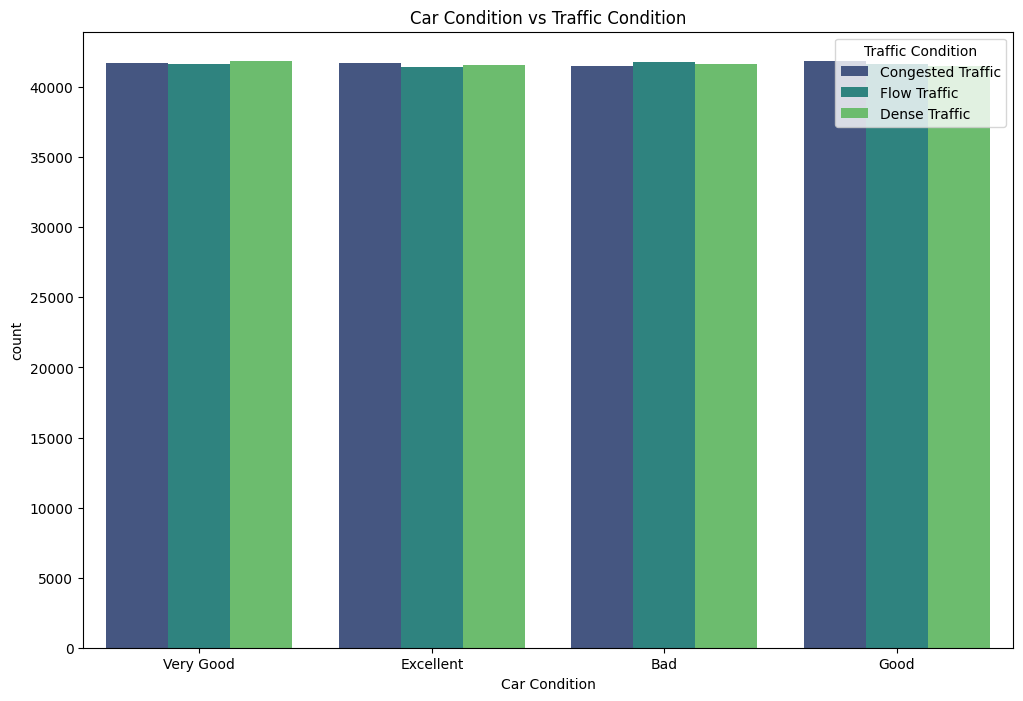

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Car Condition', hue='Traffic Condition', data=df, palette='viridis')
plt.title('Car Condition vs Traffic Condition')
plt.show()